# Visualization of the Tweets Data

## Import the libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

from matplotlib import pyplot as plt
from IPython.display import Image

## read data

In [5]:
def readData():
    train = pd.read_csv('../input/train.csv')
    test = pd.read_csv('../input/test.csv')
    return train, test

train, test = readData()

# Ploting some summary

In [6]:
train[train.keyword.notnull()]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...,...
7578,10830,wrecked,NaN,@jt_ruff23 @cameronhacker and I wrecked you both,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0


## Working on the column "location"

In [7]:
def remove_State(location):
    if(isinstance(location, str) == False):
        return location
    comma = location.find(',')
    if(comma >= 0):
        location = location[:comma]
    if(location[-1] == " "):
        location = location[:-1]
    return location

train['location'] = train['location'].apply(remove_State)


In [8]:
print(len(train.location.unique()))
print(train.location.unique()[:10])
print(train.location.unique()[2300:2310])
print(train.location.unique()[3330:3342])

2880
[nan 'Birmingham' 'Est. September 2012 - Bristol' 'AFRICA' 'Philadelphia'
 'London' 'Pretoria' 'World Wide!!' 'Paranaque City' 'Live On Webcam']
['London / Birmingham' 'texas' 'Yulee' 'austin tx' 'Garrett'
 'followurDREAMS(& my instagram)' 'sheffield // rotherham' 'Wailuku'
 'Long Beach' 'Belfast']
[]


In [9]:
locations = train.groupby('location').size()
Often_locations = locations[locations > 20]
Often_locations.size

17

In [10]:
city_index = train.loc[train.location.isin(Often_locations.index),['location','target']].groupby(['location','target']).size()
city_index = pd.DataFrame(city_index)
city_index.reset_index(inplace=True)
city_index.columns = ['location', 'target','count']
city_index

,location,target,count
0,Calgary,0,4
1,Calgary,1,17
2,California,0,23
3,California,1,18
4,Canada,0,17
5,Canada,1,13
6,Chicago,0,19
7,Chicago,1,17
8,India,0,4
9,India,1,20


In [11]:
ratings = []
i = 0
for i, row in city_index.iterrows():
    if i%2 == 0:
        city_0 = row['count']
    else:
        city_1 = row['count']
        ratings += [city_0/(city_1+city_0)]
        ratings += [city_1/(city_1+city_0)]

rate = [np.round(x*100, 2) for x in ratings]


city_index['rate'] = rate
city_index[city_index.rate > 60]

,location,target,count,rate
1,Calgary,1,17,80.95
9,India,1,20,83.33
10,London,0,46,64.79
12,Los Angeles,0,30,63.83
15,Mumbai,1,24,82.76
16,New York,0,71,73.20
19,Nigeria,1,27,79.41
22,Seattle,0,15,68.18
29,USA,1,70,63.64
33,Washington,1,31,68.89


## Working on the column "keyword"

In [13]:
print(len(train.keyword.unique()))
print(train.keyword.unique())

222
[nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'devastation' 'disaster' 'displaced' 'd

In [18]:
keywords = train.groupby(['keyword']).size().to_frame('count')
keywords.reset_index(0, inplace=True)

keywords[keywords['count']<23]

,keyword,count
94,epicentre,12
115,forest%20fire,19
134,inundation,10
160,radiation%20emergency,9
164,rescue,22
194,threat,11


Only 6 keywords shows up an amount smaller than 3*stardard deviation

In [15]:
keywords[keywords['count']>22].describe()

,count
count,215.000000
mean,34.739535
std,3.310571
min,24.000000
25%,33.000000
50%,35.000000
75%,37.000000
max,45.000000


# Working on the "target"

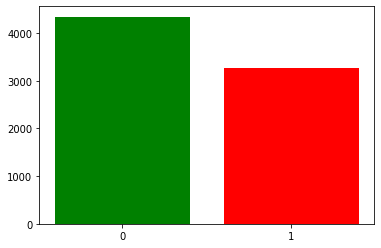

In [92]:
target_counts = train.groupby('target').size().reset_index()
target_counts
plt.bar(['0','1'],target_counts[0],color=['g','r'])
plt.show()

In [68]:
key_0 = train[train.target == 0].keyword.unique()
print(len(key_0))
print(key_0[:10])
print(key_0[-10:])

219
[nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon']
['weapon' 'weapons' 'whirlwind' 'wild%20fires' 'wildfire' 'windstorm'
 'wounded' 'wounds' 'wreck' 'wrecked']


In [69]:
key_1 = train[train.target == 1].keyword.unique()
print(len(key_1))
print(key_1[:10])
print(key_1[-10:])

221
[nan 'ablaze' 'accident' 'airplane%20accident' 'ambulance' 'annihilated'
 'annihilation' 'apocalypse' 'armageddon' 'army']
['weapons' 'whirlwind' 'wild%20fires' 'wildfire' 'windstorm' 'wounded'
 'wounds' 'wreck' 'wreckage' 'wrecked']


In [71]:
#reminding
len(train.keyword.unique())

222

Almost all keywords appears in both targets!!

In [72]:
local_0 = train[train.target == 0].location.unique()
print(len(local_0))
print(local_0[:10])
print(local_0[-10:])

1900
[nan 'Est. September 2012 - Bristol' 'Philadelphia' 'London' 'Pretoria'
 'Paranaque City' 'Live On Webcam' 'milky way' 'England.' 'Barbados']
['Milwaukee County' 'Click the link below' 'probably not home' '6'
 'At your back' 'Livingston' '  Glasgow' 'Denton' 'TN'
 '#NewcastleuponTyne #UK']


In [73]:
local_1 = train[train.target == 1].location.unique()
print(len(local_1))
print(local_1[:10])
print(local_1[-10:])

1315
[nan 'Birmingham' 'AFRICA' 'World Wide!!' 'GREENSBORO'
 'Sheffield Township' 'India' 'Anaheim' 'USA' 'South Africa']
['khanna' 'Bangkok' 'Punjab' 'Dublin City' 'uk' 'No ID' 'Maharashtra'
 "Xi'an" 'Santa Cruz' 'Manhattan']


In [74]:
#reminding
len(train.location.unique())

2880

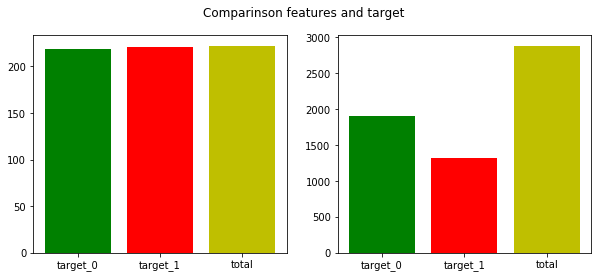

In [89]:
names = ['target_0', 'target_1', 'total']
key_values = [219,221,222]
local_values = [1900, 1315, 2880]


plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.bar(names, key_values, color=['g','r','y'])
plt.subplot(122)
plt.bar(names, local_values, color=['g','r','y'])
plt.suptitle('Comparinson features and target')
plt.show()

# Working on the Text